We will develop several models that will predict the price of the car using the variables or features.

Some questions we want to ask in this module

- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#Let's load the modules for linear regression:

from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
Yhat = lm.predict(X)
Yhat=[0/5]

In [11]:
lm.intercept_

array([38423.30585816])

In [12]:
lm.coef_

array([[-821.73337832]])

**Y hat = a + bX**

Plugging in the actual values we get:

Price = 38423.31 - 821.73 x highway-mpg

Now we will take a look at engine-size/price relationship.

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
X = df[['engine-size']]
Y = df[['price']]

In [15]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
Yhat = lm.predict(X)
Yhat = [0/5]

In [17]:
lm.intercept_

array([-7963.33890628])

In [18]:
lm.coef_

array([[166.86001569]])

Yhat= -7963.34 + 166.86*X

Price= -7963.34 + 166.86*engine-size

What if we want to predict car price using more than one variable? We use **Multiple Linear Regression**

𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4

Here,
- Y= Response Variable
- X_1 = Predictor Variable 1
- a = Intercept
- b_1 = Coefficients of Variable 1

From the previous section we know that other good predictors of price could be:

- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

In [20]:
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm.intercept_

-15806.62462632922

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

Let's create another multiple linear regression train model where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [26]:
Z = df[['normalized-losses' , 'highway-mpg']]

In [27]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lm.intercept_

38201.31327245728

In [29]:
lm.coef_

array([   1.49789586, -820.45434016])

Price = 38201.31 + 1.5 * normalized-losses - 820.45 * highwap-mpg

In [30]:
#Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

import seaborn as sns
%matplotlib inline

(0.0, 48185.645811862516)

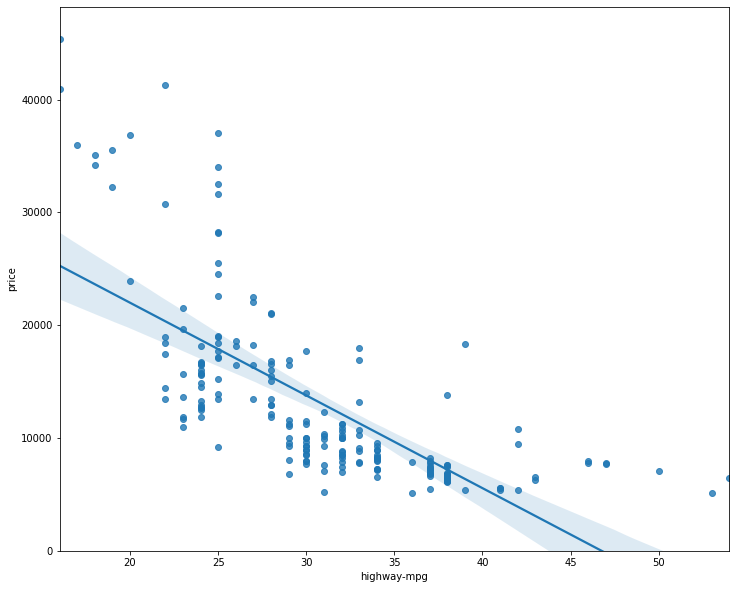

In [31]:
#When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
#Let's visualize highway-mpg as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

(0.0, 47414.1)

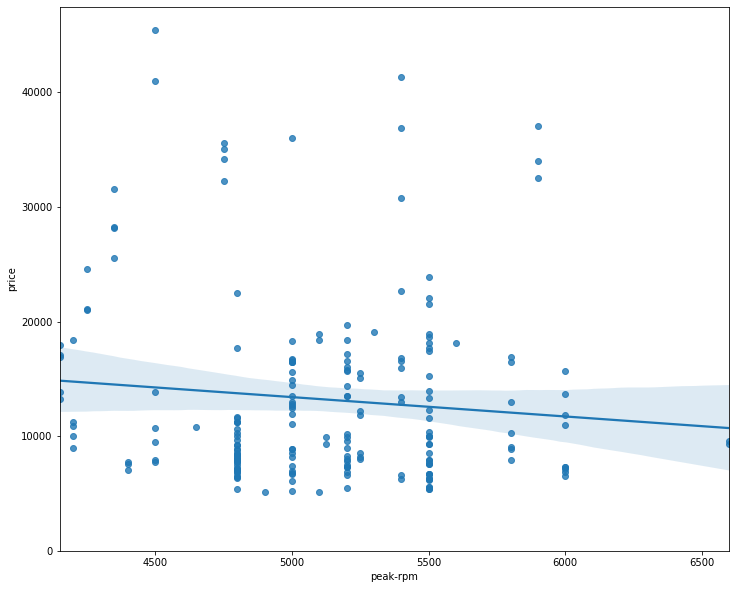

In [32]:
#Let's compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [33]:
#Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? 

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


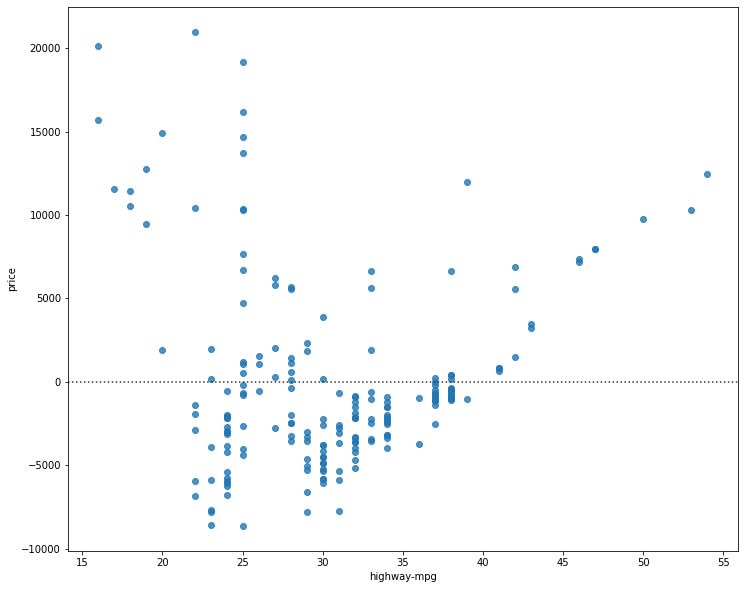

In [34]:
#A good way to visualize the variance of the data is to use a residual plot.

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [35]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


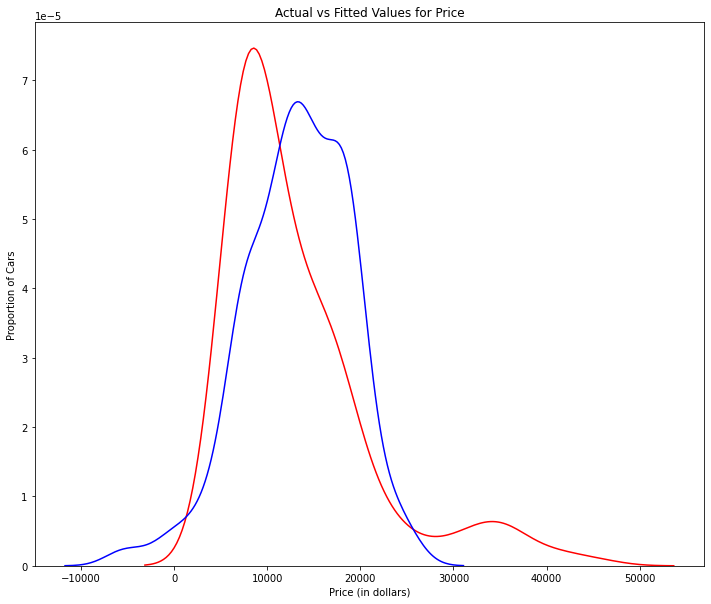

In [36]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [38]:
#We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()


In [39]:
x = df['highway-mpg']
y = df['price']

In [40]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


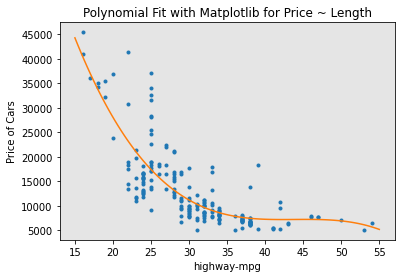

In [41]:
PlotPolly(p, x, y, 'highway-mpg')

In [42]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [43]:
#We can perform a polynomial transform on multiple features.

from sklearn.preprocessing import PolynomialFeatures

In [44]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [45]:
Z_pr=pr.fit_transform(Z)

In [46]:
Z.shape

(201, 2)

In [47]:
Z_pr.shape

(201, 6)

In [48]:
#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [51]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [53]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

In [54]:
#Model 1: Simple Linear Regression

#1.Let's calculate the R^2:

lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [55]:
#2.Let's calculate the MSE:

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


In [58]:
#Model 2 : Multiple Linear Regression

#1.Let's calculate the R^2:

lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.4966263556974878


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [59]:
#2.Let's calculate the MSE:

Y_predict_multifit = lm.predict(Z)

In [60]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  31632832.975589428


In [61]:
#Model 3: Polynomial Fit
#1.Let's calculate the R^2:

from sklearn.metrics import r2_score

In [62]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [63]:
#2.Let's calculate the MSE:

mean_squared_error(df['price'], p(x))

20474146.426361226

**Prediction**

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [64]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [65]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [66]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

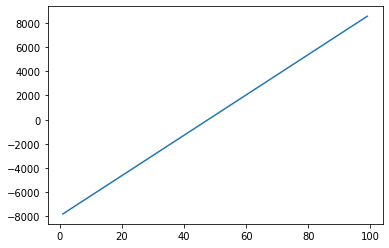

In [68]:
plt.plot(new_input, yhat)
plt.show()

**Decision Making: Determining a Good Model Fit**

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

**What is a good R-squared value?**

When comparing models, the model with the higher R-squared value is a better fit for the data.

**What is a good MSE?**

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models: 

**Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.**

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and 

**Highway-mpg as Predictor Variables of Price.**

R-squared: 0.80896354913783497
MSE: 1.2 x10^7

**Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.**

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

**Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

**Simple Linear Model (SLR) vs. Polynomial Fit**

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

**Multiple Linear Regression (MLR) vs. Polynomial Fit**

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

**Conclusion**

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.